# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data = pd.merge(study_results, mouse_metadata, how = "outer", on=["Mouse ID"])

# Display the data table for preview
complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mouse_count = complete_data['Mouse ID'].nunique()
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_df = complete_data.loc[complete_data.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_df

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df_data = complete_data.loc[complete_data["Mouse ID"] == 'g989', :]
duplicate_df_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = complete_data[complete_data['Mouse ID'].isin(duplicate_df)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df_mouse_count = clean_df['Mouse ID'].nunique()
clean_df_mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).mean()
median = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).median()
variance = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).var()
std_dev = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).std()
SEM = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).sem()

Summary_stats = pd.DataFrame({"Mean Tumor Volume": mean,
                             "Median Tumor Volume": median,
                             "Variance Tumor Volume": variance,
                             "Standard Deviation Tumor Volume": std_dev,
                             "Standard Error Tumor Volume": SEM})
Summary_stats

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,Standard Error Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
stats_summary_agg = clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
stats_summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

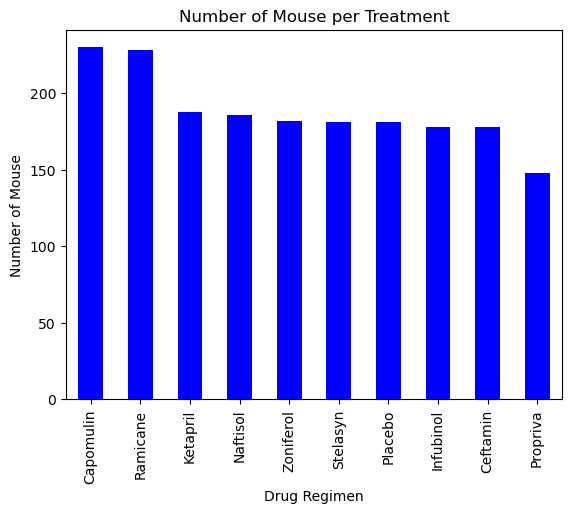

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_count = clean_df["Drug Regimen"].value_counts()
#mouse_count
mouse_count.plot(kind='bar', color='b',
                  xlabel='Drug Regimen',
                  ylabel='Number of Mouse',
                  title='Number of Mouse per Treatment')
plt.show()

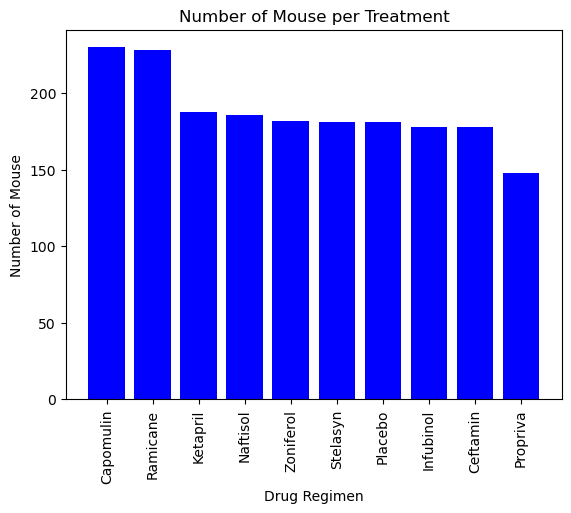

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mouse_count.index.values
y_axis = mouse_count.values
plt.bar(x_axis, y_axis, color="b", align="center")
plt.title("Number of Mouse per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse")
plt.xticks(rotation='vertical')
plt.show()

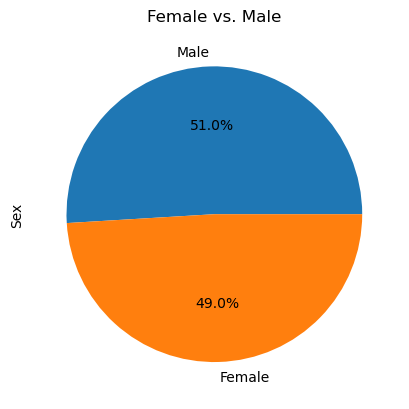

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_data = clean_df["Sex"].value_counts()
sex_data.plot(kind='pie', title='Female vs. Male', autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

In [12]:
#counting Male and Female Mouse percentage
sex_size = clean_df.groupby(["Mouse ID","Sex"])
sex_df = pd.DataFrame(sex_size.size())

#New Dataframe to count total number of mouse
gender_df = pd.DataFrame(sex_df.groupby(["Sex"]).count())
gender_df.columns = ["Total Count"]

#Calculate percentage of each gender
gender_df["sex_percentage"] = (gender_df["Total Count"]/gender_df["Total Count"].sum())*100

#formatting
gender_df["sex_percentage"] = gender_df["sex_percentage"]

gender_df

,Total Count,sex_percentage
Sex,,
Female,123,49.596774
Male,125,50.403226


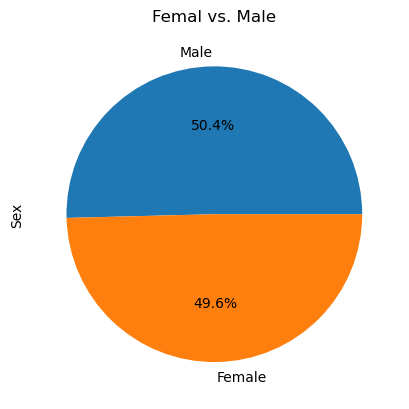

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender =['Male', 'Female']
sizes =[50.403226, 49.596774]
plt.pie(sizes, labels=gender, autopct='%1.1f%%')
plt.title("Femal vs. Male")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin',:]
Ramicane_df = clean_df.loc[clean_df['Drug Regimen'] == 'Ramicane',:]
Infubinol_df = clean_df.loc[clean_df['Drug Regimen'] == 'Infubinol',:]
Ceftamin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Ceftamin',:]

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [15]:
# Start by getting the last (greatest) timepoint for each mouse
#Calculations for Capomulin
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [16]:
#Calculation of quartiles and IQR for Capomulin
Capomulin_tumor = Capomulin_merge['Tumor Volume (mm3)']
quartiles =Capomulin_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#Calculate potential outliers 
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#printing the results for Capomulin
print(f"The value of lower quartile for Capomulin is: {lowerq}")
print(f"The value of upper quartile for Capomulin is: {upperq}")
print(f"The interquartile range for Capomulin is: {iqr}")
print(f"The value of median for Capomulin is: {quartiles[.5]}")

print(f"Values below: {lower_bound} and values above: {upper_bound} are considered as outliers for Capomulin. ")

The value of lower quartile for Capomulin is: 32.37735684
The value of upper quartile for Capomulin is: 40.1592203
The interquartile range for Capomulin is: 7.781863460000004
The value of median for Capomulin is: 38.1251644
Values below: 20.70456164999999 and values above: 51.83201549 are considered as outliers for Capomulin. 


In [17]:
# Start by getting the last (greatest) timepoint for each mouse
#Calculations for Ramicane
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20


In [18]:
#Calculation of quartiles and IQR for Ramicane
Ramicane_tumor = Ramicane_merge['Tumor Volume (mm3)']
quartiles = Ramicane_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#Calculate potential outliers 
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#printing the results for Ramicane
print(f"The value of lower quartile for Ramicane is: {lowerq}")
print(f"The value of upper quartile for Ramicane is: {upperq}")
print(f"The interquartile range for Ramicane is: {iqr}")
print(f"The value of median for Ramicane is: {quartiles[.5]}")

print(f"Values below: {lower_bound} and values above: {upper_bound} are considered as outliers for Infubinol. ")

The value of lower quartile for Ramicane is: 31.56046955
The value of upper quartile for Ramicane is: 40.65900627
The interquartile range for Ramicane is: 9.098536719999998
The value of median for Ramicane is: 36.56165229
Values below: 17.912664470000003 and values above: 54.30681135 are considered as outliers for Infubinol. 


In [19]:
# Start by getting the last (greatest) timepoint for each mouse
#Calculations for Infubinol
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [20]:
#Calculation of quartiles and IQR for Infubinol
Infubinol_tumor = Infubinol_merge['Tumor Volume (mm3)']
quartiles = Infubinol_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#Calculate potential outliers 
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#printing the results for Infubinol
print(f"The value of lower quartile for Infubinol is: {lowerq}")
print(f"The value of upper quartile for Infubinol is: {upperq}")
print(f"The interquartile range for Infubinol is: {iqr}")
print(f"The value of median for Infubinol is: {quartiles[.5]}")

print(f"Values below: {lower_bound} and values above: {upper_bound} are considered as outliers for Infubinol. ")

The value of lower quartile for Infubinol is: 54.04860769
The value of upper quartile for Infubinol is: 65.52574285
The interquartile range for Infubinol is: 11.477135160000003
The value of median for Infubinol is: 60.16518046
Values below: 36.83290494999999 and values above: 82.74144559000001 are considered as outliers for Infubinol. 


In [21]:
# Start by getting the last (greatest) timepoint for each mouse
#Calculations for Ceftamin
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25


In [22]:
#Calculation of quartiles and IQR for Ceftamin
Ceftamin_tumor = Ceftamin_merge['Tumor Volume (mm3)']
quartiles = Ceftamin_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#Calculate potential outliers 
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#printing the results for Ceftamin
print(f"The value of lower quartile for Ceftamin is: {lowerq}")
print(f"The value of upper quartile for Ceftamin is: {upperq}")
print(f"The interquartile range for Ceftamin is: {iqr}")
print(f"The value of median for Ceftamin is: {quartiles[.5]}")

print(f"Values below: {lower_bound} and values above: {upper_bound} are considered as outliers for Ceftamin. ")

The value of lower quartile for Ceftamin is: 48.72207785
The value of upper quartile for Ceftamin is: 64.29983003
The interquartile range for Ceftamin is: 15.577752179999997
The value of median for Ceftamin is: 59.85195552
Values below: 25.355449580000002 and values above: 87.66645829999999 are considered as outliers for Ceftamin. 


In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_df = clean_df[clean_df["Drug Regimen"].isin(drugs_list)]
drug_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [24]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = drug_df.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
#Reshaping the DF
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
treatments = 0
for drug in drugs_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    if treatments == 0:
        print(f"------------------------------------------------------------")
    print(f"Values below: {lower_bound} and values above: {upper_bound} are considered as outliers for {drug}.")
    print(f"------------------------------------------------------------")
    treatments+=1


------------------------------------------------------------
Values below: 20.71 and values above: 51.83 are considered as outliers for Capomulin.
------------------------------------------------------------
Values below: 17.91 and values above: 54.31 are considered as outliers for Ramicane.
------------------------------------------------------------
Values below: 36.83 and values above: 82.75 are considered as outliers for Infubinol.
------------------------------------------------------------
Values below: 25.35 and values above: 87.67 are considered as outliers for Ceftamin.
------------------------------------------------------------


C:\Users\piyu_\AppData\Local\Temp\ipykernel_3352\4185899788.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])


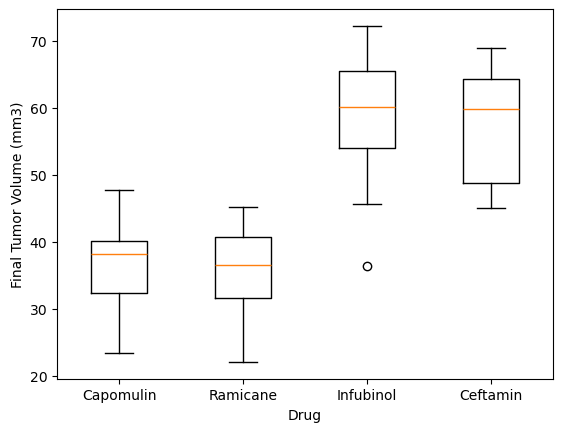

In [26]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_list = []
for drug in drugs_list:
    boxplot_list.append(list(last_timepoint[drug].dropna()))
    
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.set_xlabel("Drug")
ax.set_ylabel("Final Tumor Volume (mm3)")
ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
ax.boxplot(boxplot_list)
plt.show()

## Line and Scatter Plots

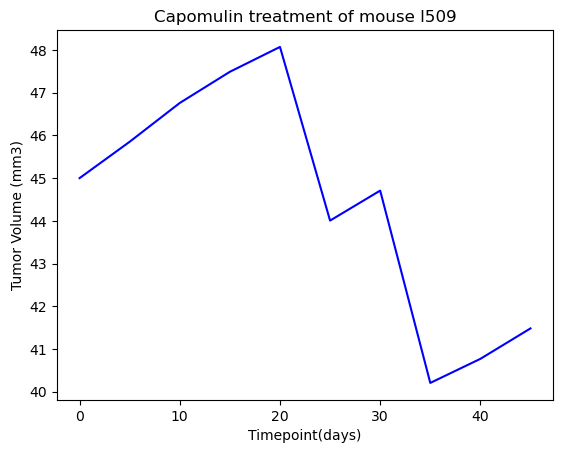

In [27]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
line_df.head()
x_axis = line_df["Timepoint"]
y_axis = line_df["Tumor Volume (mm3)"]

fig, ax = plt.subplots()
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_axis, y_axis, color='b')
plt.show()

C:\Users\piyu_\AppData\Local\Temp\ipykernel_3352\3157932462.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Capomulin_df['Weight (g)'] = pd.to_numeric(Capomulin_df['Weight (g)'], errors='coerce')
C:\Users\piyu_\AppData\Local\Temp\ipykernel_3352\3157932462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Capomulin_df['Tumor Volume (mm3)'] = pd.to_numeric(Capomulin_df['Tumor Volume (mm3)'], errors='coerce')


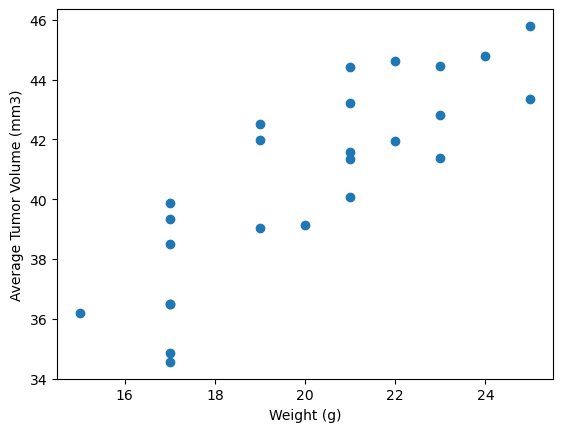

In [28]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#Converting weight and Tumor Volume columns to numeric values
Capomulin_df['Weight (g)'] = pd.to_numeric(Capomulin_df['Weight (g)'], errors='coerce')
Capomulin_df['Tumor Volume (mm3)'] = pd.to_numeric(Capomulin_df['Tumor Volume (mm3)'], errors='coerce')

Capomulin_avg_values = Capomulin_df.groupby('Mouse ID').agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'})
plt.scatter(Capomulin_avg_values['Weight (g)'], Capomulin_avg_values['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [29]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(Capomulin_avg_values['Weight (g)'], Capomulin_avg_values['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume 0.84


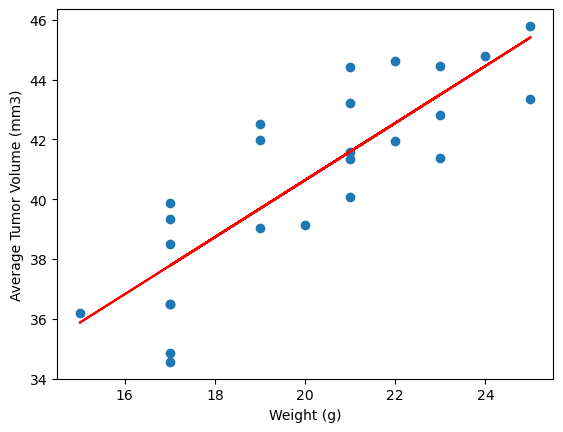

In [31]:
#linear regression model between mouse weight and average observed tumor volume for the entire Capomulin treatment regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(Capomulin_avg_values['Weight (g)'], Capomulin_avg_values['Tumor Volume (mm3)'])
regress_values = Capomulin_avg_values['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Capomulin_avg_values['Weight (g)'], Capomulin_avg_values['Tumor Volume (mm3)'])
plt.plot(Capomulin_avg_values['Weight (g)'],regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()